<a href="https://colab.research.google.com/github/MdNafish2002/Automatic-Number-Plate-Recognition/blob/main/ANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install and Import Dependencies**

In [ ]:
!pip install easyocr

In [ ]:
!pip install imutils

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read in Image, Grayscale and Blur**

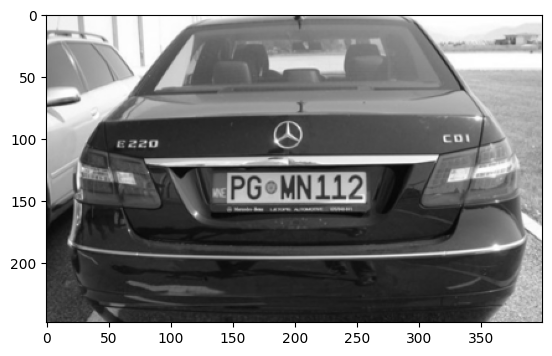

In [ ]:
img = cv2.imread('/content/drive/MyDrive/check label/images/Cars1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**Apply filter and find edges for localization**

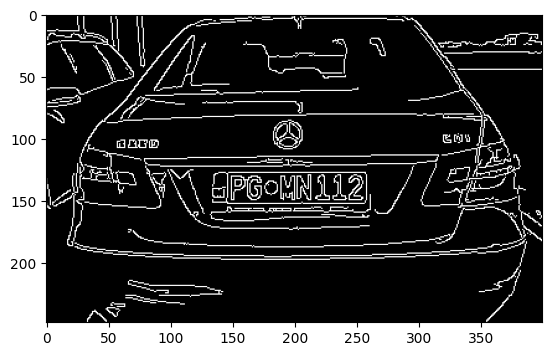

In [ ]:
bfilter= cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

**Find Contours and Apply Mask**

In [ ]:
keypoints= cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break
location

array([[[146, 128]],

       [[256, 127]],

       [[258, 149]],

       [[147, 152]]], dtype=int32)

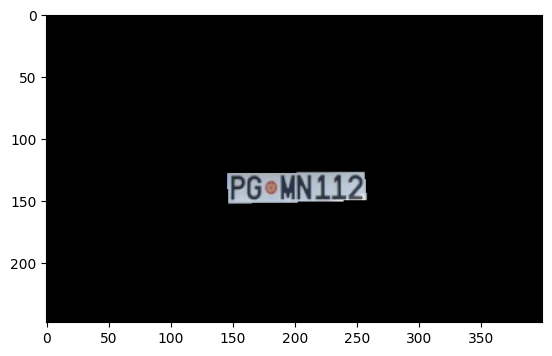

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

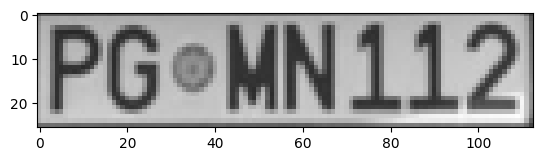

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


**Use Easy OCR To Read Text**

In [ ]:
reader= easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [113, 0], [113, 26], [0, 26]], 'PGoMN112', 0.7092827764434613)]

**Render Result**

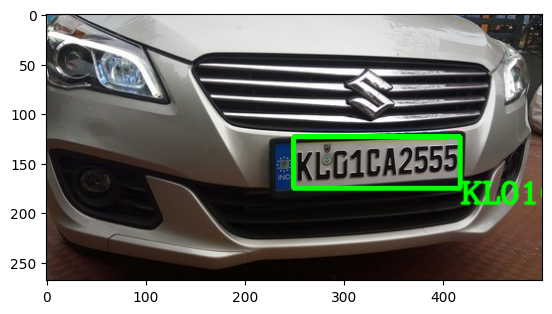

In [ ]:
#text = result[0][-2]
#font = cv2.FONT_HERSHEY_COMPLEX
#res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60),
 #                 fontFace=font, fontScale=1, color=(0,255,0), thickness=2 , lineType=cv2.LINE_AA)
#res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
#plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

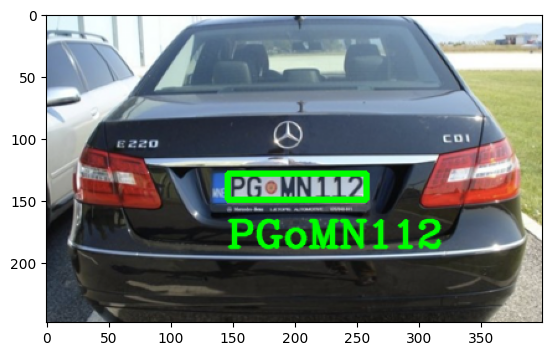

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'result', 'img', and 'approx' are already defined in your code

# Extract the text to be displayed
text = result[0][-2]

# Define the font parameters
font = cv2.FONT_HERSHEY_COMPLEX
font_scale = 1
font_thickness = 2

# Get the image dimensions
img_height, img_width = img.shape[:2]

# Calculate the size of the text box
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)

# Calculate the initial position
x, y = approx[0][0][0], approx[1][0][1] + 60

# Adjust the x position if the text goes beyond the right edge
if x + text_width > img_width:
    x = img_width - text_width

# Adjust the y position if the text goes beyond the bottom edge
if y + text_height > img_height:
    y = img_height - text_height

# Place the text on the image
res = cv2.putText(img, text=text, org=(x, y), fontFace=font, fontScale=font_scale, color=(0, 255, 0), thickness=font_thickness, lineType=cv2.LINE_AA)

# Draw the rectangle (you may want to adjust this part as well)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

# Display the image
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()
